### Load Data and Libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

soil_chemistry = pd.read_excel("Combined_Jan_Feb.xlsx")
soil_chemistry.head()

Populating the interactive namespace from numpy and matplotlib


/Users/stronglab2/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,Sample name,pH,Temp,Cond. mS/cm,Ca2+,Mg2+,Na1+,K1+,HCO31-,F1-,...,SiO2,Sn,Sr,Ti,Tl,V,Zn,δ18O,δD,Month
0,18-STR-1,7.226114,20.9,96.721774,1.739,4.075,11.38,0.2765,13.533913,0.005,...,8.286838,0.0,0.0239,0.0015,0.0035,0.0004,0.0010,-2.197088,-3.172445,Jan
1,18-STR-2,7.871971,21.7,176.504402,7.704,9.590,14.37,0.8598,51.453254,0.042,...,9.427857,0.0,0.0573,0.0010,0.0043,0.0014,0.0006,-2.523575,-5.544992,Jan
2,18-STR-3,7.791080,21.3,162.011372,6.953,6.118,16.24,0.9046,34.871163,0.025,...,9.999437,0.0,0.0491,0.0020,0.0043,0.0011,0.0014,-2.391885,-4.243637,Jan
3,18-STR-4,7.812208,21.8,271.226706,11.090,9.801,32.34,0.9995,81.691186,0.069,...,23.655273,0.0,0.0599,0.0003,0.0029,0.0261,0.0040,-3.087917,-10.203656,Jan
4,18-STR-5,8.129583,21.4,230.684018,10.550,9.321,23.12,1.1330,60.719717,0.049,...,19.810488,0.0,0.0673,0.0001,0.0039,0.0178,0.0034,-3.049300,-9.572673,Jan


### Hierarchical clustering

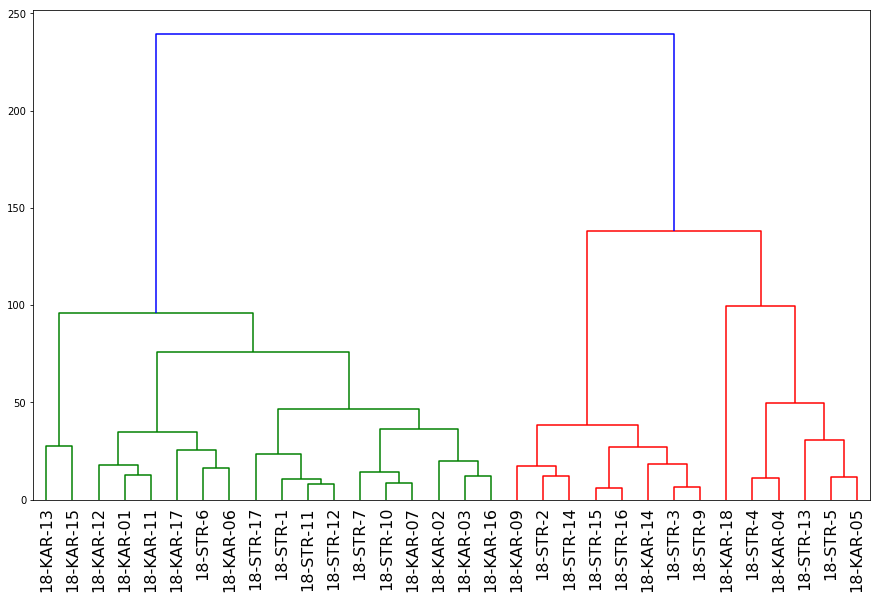

In [32]:
# Remove the grain species from the DataFrame, save for later
Location = list(soil_chemistry.pop("Sample name"))
Month = list(soil_chemistry.pop("Month"))

# Extract the measurements as a NumPy array
samples = soil_chemistry.values
mergings = linkage(samples, method='complete')


dendrogram(mergings,
           labels=Location,
           leaf_rotation=90,
           leaf_font_size=16,
           )

plt.show()

### Correlation Matrix

In [49]:
from pandas.plotting import scatter_matrix

soil_chemistry = pd.read_excel("Combined_Jan_Feb.xlsx")
soil_chemistry.pop("Sample name")
soil_chemistry.head()

,pH,Temp,Cond. mS/cm,Ca2+,Mg2+,Na1+,K1+,HCO31-,F1-,Cl1-,...,SiO2,Sn,Sr,Ti,Tl,V,Zn,δ18O,δD,Month
0,7.226114,20.9,96.721774,1.739,4.075,11.38,0.2765,13.533913,0.005,20.057,...,8.286838,0.0,0.0239,0.0015,0.0035,0.0004,0.0010,-2.197088,-3.172445,Jan
1,7.871971,21.7,176.504402,7.704,9.590,14.37,0.8598,51.453254,0.042,23.433,...,9.427857,0.0,0.0573,0.0010,0.0043,0.0014,0.0006,-2.523575,-5.544992,Jan
2,7.791080,21.3,162.011372,6.953,6.118,16.24,0.9046,34.871163,0.025,26.549,...,9.999437,0.0,0.0491,0.0020,0.0043,0.0011,0.0014,-2.391885,-4.243637,Jan
3,7.812208,21.8,271.226706,11.090,9.801,32.34,0.9995,81.691186,0.069,35.579,...,23.655273,0.0,0.0599,0.0003,0.0029,0.0261,0.0040,-3.087917,-10.203656,Jan
4,8.129583,21.4,230.684018,10.550,9.321,23.12,1.1330,60.719717,0.049,34.624,...,19.810488,0.0,0.0673,0.0001,0.0039,0.0178,0.0034,-3.049300,-9.572673,Jan


In [52]:
corr_matrix = soil_chemistry.corr()

Text(0.5,0.98,u'Soil Attributes Correlation Heatmap')

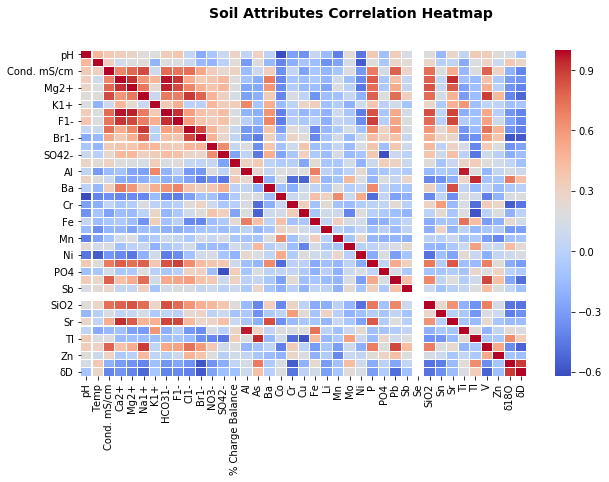

In [58]:
import seaborn as sns
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
hm = sns.heatmap(corr_matrix, 
                 ax=ax, # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 square=False,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=False, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)
fig.suptitle('Soil Attributes Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

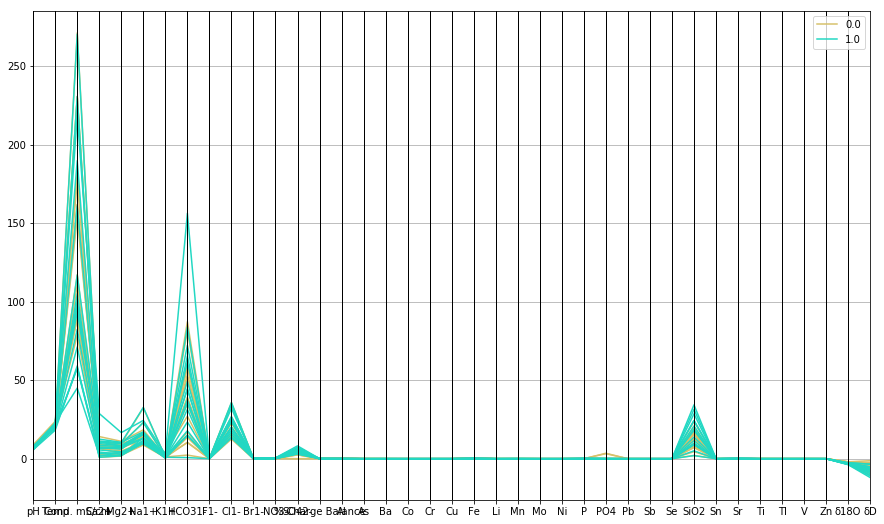

In [47]:
from pandas.plotting import parallel_coordinates

plt.figure()
parallel_coordinates(df2, 'Month_int')